In [1]:
import wrangle_jones

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
# importing and cleaning data
df = wrangle_jones.wrangle_zillow(wrangle_jones.acquire_zillow())

NumExpr defaulting to 8 threads.


In [3]:
df.columns

Index(['baths', 'beds', 'sqft', 'fullbaths', 'latitude', 'longitude',
       'tax_value', 'logerror', 'age'],
      dtype='object')

In [4]:
outlier_cols = ['baths', 'beds', 'sqft', 'fullbaths', 'tax_value', 'logerror']

# Univariate Analysis
- Looking at the distributions of our variable

>#### Code for Outliers, Before and After Viz

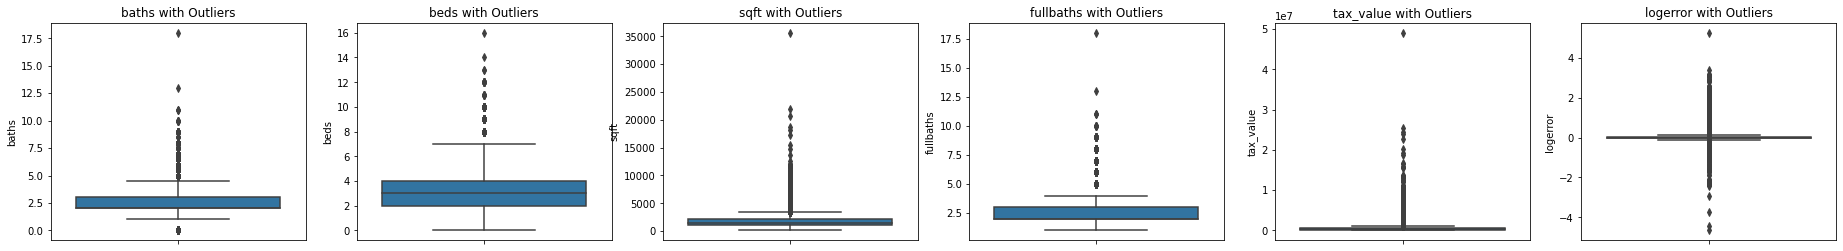

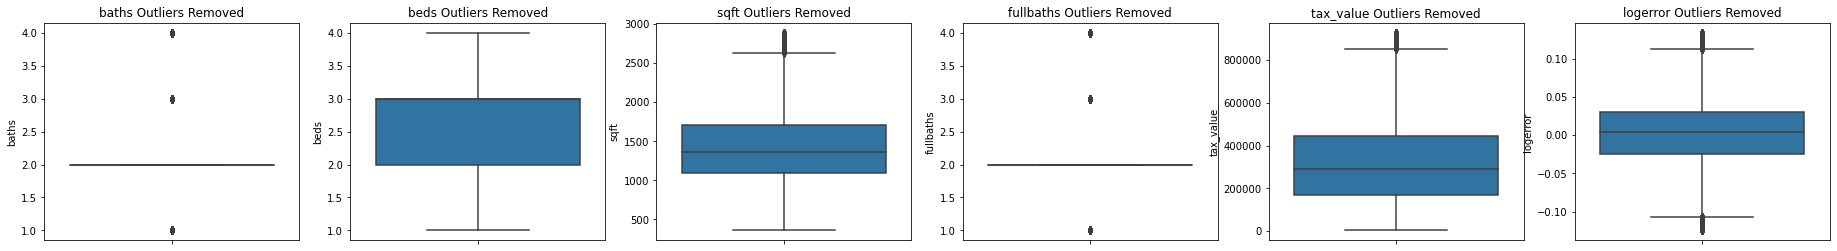

In [5]:
plt.figure(figsize = (32, 4))
    
# for loop that visualizes data with boxplots, before and after outliers removes
# 1st row of boxplots, shows data before outliers removed
for i, col in enumerate(outlier_cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplots
    plt.subplot(1, len(outlier_cols), plot_number)

    # Title with column name
    plt.title(f'{col} with Outliers')

    # Display boxplot for column
    sns.boxplot(data = wrangle_jones.acquire_zillow(), y = wrangle_jones.acquire_zillow()[col])

    # Hide gridlines.
    plt.grid(False)
    
# 2nd row of boxplots, shows data after outliers removed
plt.figure(figsize = (32, 4))
    
# for loop that cycles through list of columns where outliers will be removed  (uses cleaned df names)
for i, col in enumerate(outlier_cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(outlier_cols), plot_number)

    # Title with column name.
    plt.title(f'{col} Outliers Removed')

    # Display boxplot for column.
    sns.boxplot(data = df, y = df[col])
        
    # Hide gridlines.
    plt.grid(False)

#### testing `explore.py` function

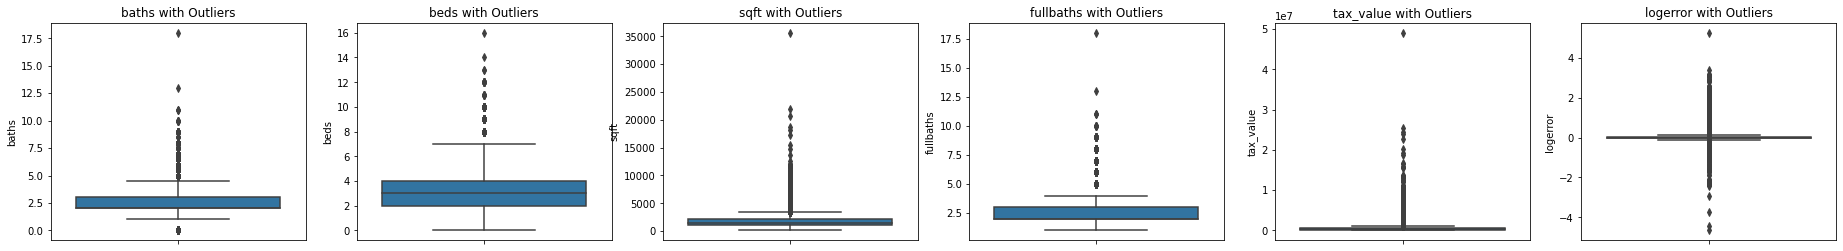

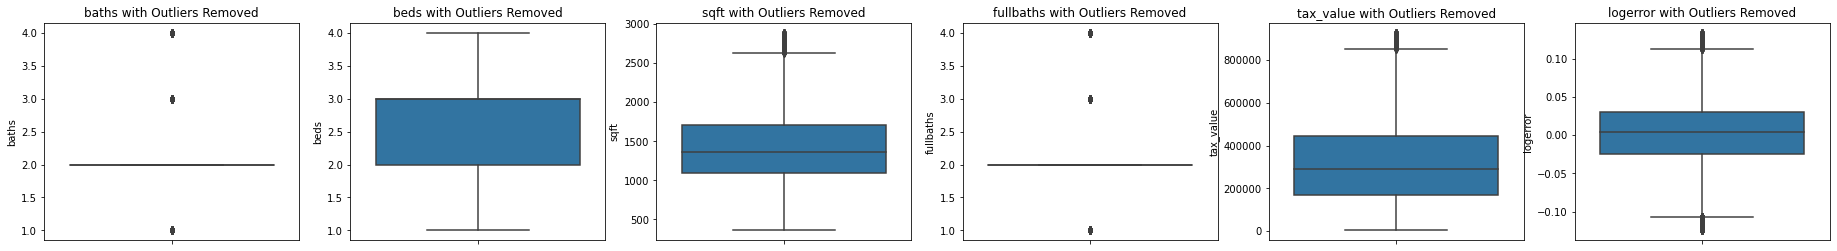

In [6]:
import explore_jones

explore_jones.visualize_outliers()

## Takeaways:
- We were able to remove a signficant amount of outliers from our data
- We can now actually visualize the IQR for `sqft`, `tax_value`, and `logerror`, where we could not before
- Interesting adjustment to the IQR for `baths` and `fullbaths`

In [7]:
for col in df.columns:
    if df[col].nunique() < 10:
        print(f'{col.upper()}: {df[col].nunique()} Unique Values')
        print(df[col].value_counts())
        print()
        
    else:
        print(f'{col.upper()}: {df[col].nunique()} Unique Values')
        print()

BATHS: 4 Unique Values
2.0    17111
1.0     8217
3.0     7958
4.0      356
Name: baths, dtype: int64

BEDS: 4 Unique Values
3    15235
2    10482
4     6048
1     1877
Name: beds, dtype: int64

SQFT: 2338 Unique Values

FULLBATHS: 4 Unique Values
2    17111
1     8217
3     7958
4      356
Name: fullbaths, dtype: int64

LATITUDE: 27016 Unique Values

LONGITUDE: 25376 Unique Values

TAX_VALUE: 23093 Unique Values

LOGERROR: 33329 Unique Values

AGE: 127 Unique Values



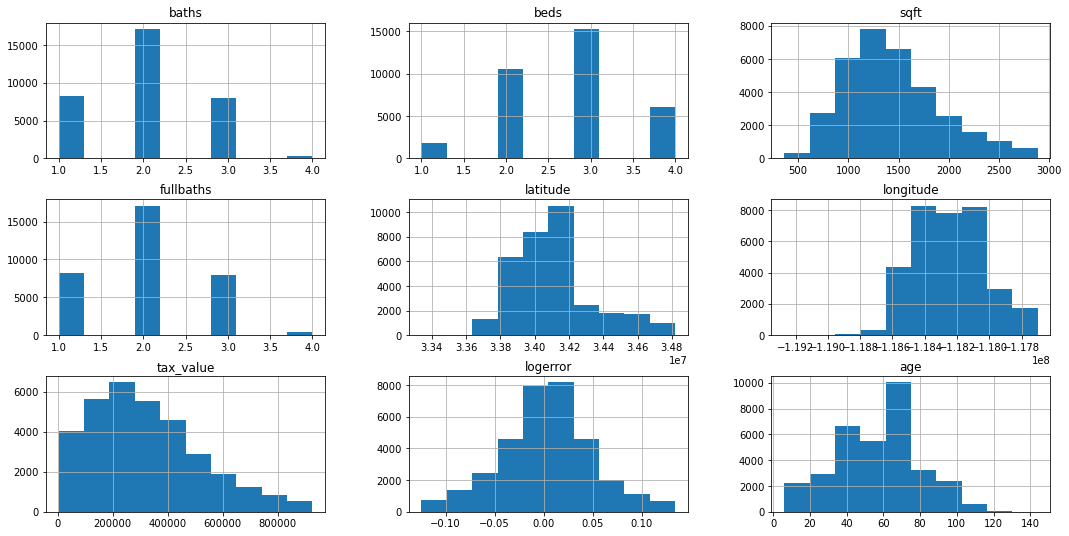

In [8]:
df.hist(figsize = (18, 9))
# plt.title('Distributions of Each Variable')
plt.show()

## Takeaways
- Our **target variable**, `logerror` is ~normally distrubuted. `longitude` is also somewhat normally distrubuted. 
- Slightly Right Skewed: `baths`, `fullbaths`, `sqft`, `latitude`, `tax_value`, and `age` 
- Slightly Left Skewed: `beds`

# Multivariate Exploration

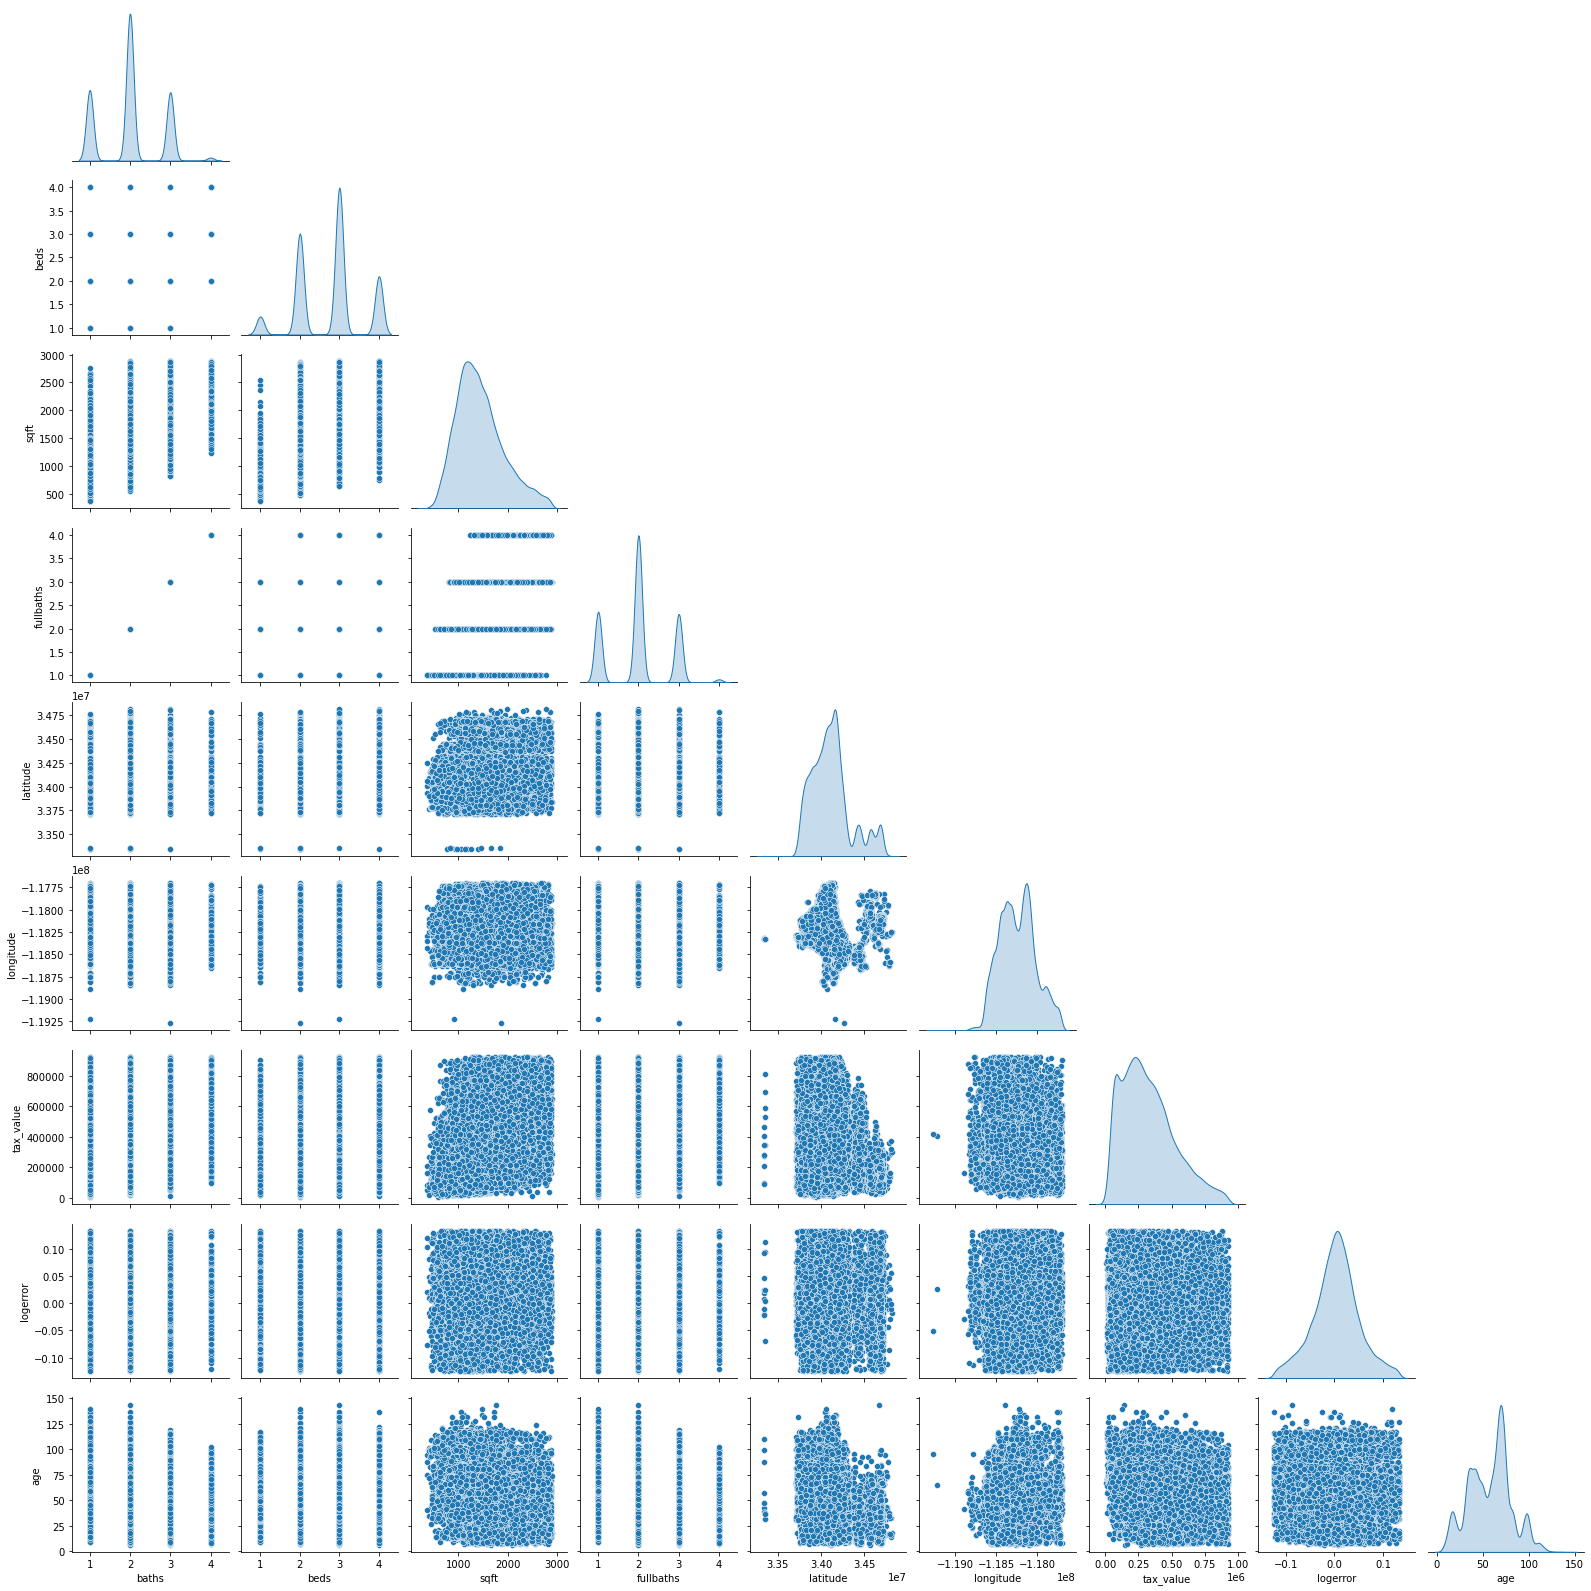

In [9]:
sns.pairplot(df, corner = True, diag_kind='kde')

### Takeaway
There is a really interesting shape when plotting `longitude` and `latitude`. I want to cluster with different variables, using `longitude` and `latitude` as the x and y and values. 

In [52]:
# splitting and scaling the data using the wrangle module for further analysis
train, validate, test = wrangle_jones.split_data(df)

In [42]:
train.head()

,baths,beds,sqft,fullbaths,latitude,longitude,tax_value,logerror,age
24277,2.0,2,763,2,33823600,-118342000,327000.0,-0.005293,20.0
10231,2.0,4,1171,2,34280592,-118425818,353000.0,-0.011207,66.0
63485,2.0,3,1108,2,34097291,-117999167,39503.0,0.009146,58.0
60254,2.0,3,1398,2,33888595,-118062849,422081.0,-0.036329,50.0
68284,3.0,2,1055,3,34235900,-118463000,136312.0,-0.036942,36.0


In [53]:
train, validate, test, train_scaled, validate_scaled, test_scaled = wrangle_jones.scale_data(train, validate, test, df)

/Users/stephanie/codeup-data-science/zillow-clustering-project/wrangle_jones.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_scaled[[f'{col}_scaled' for col in cols_to_scale]] = scaler.transform(test_scaled[cols_to_scale])
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [44]:
train_scaled.head()

,baths,beds,sqft,fullbaths,latitude,longitude,tax_value,logerror,age,baths_scaled,beds_scaled,sqft_scaled,fullbaths_scaled,tax_value_scaled,logerror_scaled,age_scaled
24277,2.0,2,763,2,33823600,-118342000,327000.0,-0.005293,20.0,-0.024568,-0.939387,-1.419227,-0.024568,0.002470,-0.183790,-1.646064
10231,2.0,4,1171,2,34280592,-118425818,353000.0,-0.011207,66.0,-0.024568,1.530082,-0.564908,-0.024568,0.132355,-0.310836,0.366355
63485,2.0,3,1108,2,34097291,-117999167,39503.0,0.009146,58.0,-0.024568,0.295348,-0.696825,-0.024568,-1.433744,0.126370,0.016369
60254,2.0,3,1398,2,33888595,-118062849,422081.0,-0.036329,50.0,-0.024568,0.295348,-0.089589,-0.024568,0.477454,-0.850465,-0.333617
68284,3.0,2,1055,3,34235900,-118463000,136312.0,-0.036942,36.0,1.352902,-0.939387,-0.807803,1.352902,-0.950127,-0.863638,-0.946093


In [45]:
train.head()

,baths,beds,sqft,fullbaths,latitude,longitude,tax_value,logerror,age
24277,2.0,2,763,2,33823600,-118342000,327000.0,-0.005293,20.0
10231,2.0,4,1171,2,34280592,-118425818,353000.0,-0.011207,66.0
63485,2.0,3,1108,2,34097291,-117999167,39503.0,0.009146,58.0
60254,2.0,3,1398,2,33888595,-118062849,422081.0,-0.036329,50.0
68284,3.0,2,1055,3,34235900,-118463000,136312.0,-0.036942,36.0


>#### Just realized the scaling function returns a df with both scaled and unscaled data, may not need to split scaling and splitting functions and be able to model and cluster using scale

# Looking at some clusters

>### Are there any interesting patterns between `latitude` and `longitude` that I can cluster on?

In [15]:
pd.DataFrame(train.columns)

,0
0,baths
1,beds
2,sqft
3,fullbaths
4,latitude
5,longitude
6,tax_value
7,logerror
8,age


>## Need to add to this description but master, heavy duty lifting cluster function, creates n-1 k columns to see cluster predictions for multiple k values in one df

In [54]:
# cluster function that I created in clustering exercises
def cluster_predictions(df, X, min_range, max_range, step, original_cols):
    '''
THIS FUNCTION TAKES IN A FULL DF, A DF OF FEATURES TO MODEL, A MIN K VALUE, AND MAX K VALUE, AND RETURNS 
A DF WITH K MEANS MODEL PREDICTIONS COLUMNS FOR THE K VALUE RANGE FROM MIN TO MAX - 1. 
    '''
    
    for n in range(min_range, max_range, step):
        # creating model object
        kmeans = KMeans(n_clusters = n)

        # fitting data to model 
        kmeans.fit(X)

        # using the. model to make predictions
        kmeans.predict(X)

        # adding predictions columns to original df and recasting dtype to object for visualizations
        df[f'{n}_clusters'] = kmeans.predict(X).astype('object')
        
    # making values in cluster predictions columns strings for visualizations (do not want ordinal)
    for col in df.columns:
        if col not in original_cols:
            df[col] = 'cluster_' + df[col].astype(str)
            
    

    return df

### First I will create clusters for lat/long
> I want to see if there are any unique geographic groupings in the data

> I will start clustering on the unscaled lat/long, but may come back later, time permitting to see clustering on the unscaled data. I am not sure if this matters, since the data is geographic in nature and unscaled data more accurately reflects the location.

In [17]:
train.columns

Index(['baths', 'beds', 'sqft', 'fullbaths', 'latitude', 'longitude',
       'tax_value', 'logerror', 'age'],
      dtype='object')

In [33]:
train_scaled.columns

Index(['baths', 'beds', 'sqft', 'fullbaths', 'latitude', 'longitude',
       'tax_value', 'logerror', 'age', 'baths_scaled', 'beds_scaled',
       'sqft_scaled', 'fullbaths_scaled', 'tax_value_scaled',
       'logerror_scaled', 'age_scaled'],
      dtype='object')

# Master cluster function :) /\ columns above to choose from

In [55]:
cluster_df_geo = cluster_predictions(train_scaled, train_scaled[['tax_value', 'age_scaled']], 2, 6, 1, train_scaled.columns)

In [56]:
cluster_df_geo.head()

,baths,beds,sqft,fullbaths,latitude,longitude,tax_value,logerror,age,baths_scaled,beds_scaled,sqft_scaled,fullbaths_scaled,tax_value_scaled,logerror_scaled,age_scaled,2_clusters,3_clusters,4_clusters,5_clusters
24277,2.0,2,763,2,33823600,-118342000,327000.0,-0.005293,20.0,-0.024568,-0.939387,-1.419227,-0.024568,0.002470,-0.183790,-1.646064,cluster_0,cluster_2,cluster_0,cluster_2
10231,2.0,4,1171,2,34280592,-118425818,353000.0,-0.011207,66.0,-0.024568,1.530082,-0.564908,-0.024568,0.132355,-0.310836,0.366355,cluster_0,cluster_2,cluster_0,cluster_2
63485,2.0,3,1108,2,34097291,-117999167,39503.0,0.009146,58.0,-0.024568,0.295348,-0.696825,-0.024568,-1.433744,0.126370,0.016369,cluster_0,cluster_1,cluster_2,cluster_3
60254,2.0,3,1398,2,33888595,-118062849,422081.0,-0.036329,50.0,-0.024568,0.295348,-0.089589,-0.024568,0.477454,-0.850465,-0.333617,cluster_1,cluster_2,cluster_1,cluster_2
68284,3.0,2,1055,3,34235900,-118463000,136312.0,-0.036942,36.0,1.352902,-0.939387,-0.807803,1.352902,-0.950127,-0.863638,-0.946093,cluster_0,cluster_1,cluster_2,cluster_3


In [49]:
cluster_df_geo.columns

Index(['baths', 'beds', 'sqft', 'fullbaths', 'latitude', 'longitude',
       'tax_value', 'logerror', 'age', 'baths_scaled', 'beds_scaled',
       'sqft_scaled', 'fullbaths_scaled', 'tax_value_scaled',
       'logerror_scaled', 'age_scaled', '2_clusters', '3_clusters',
       '4_clusters', '5_clusters'],
      dtype='object')

In [57]:
# my visualize clusters function from modeling exercises module
def visualize_clusters(cluster_df, x, y):
    '''
 THIS FUNCTION TAKES IN A DATAFRAME OF ORIGINAL DATA ALONG WITH EACH N_CLUSTERS MODEL PREDICTION COLUMN AND PLOTS
 A SCATTERPLOT FOR EACH N_CLUSTERS COLUMN, WITH EACH CLUSTER IN A DIFFERENT COLOR. 
    '''
    
    for col in cluster_df.columns:
        
        if col not in ['baths', 'beds', 'sqft', 'fullbaths', 'latitude', 'longitude',
       'tax_value', 'logerror', 'age', 'baths_scaled', 'beds_scaled',
       'sqft_scaled', 'fullbaths_scaled', 'tax_value_scaled',
       'logerror_scaled', 'age_scaled']:
            
            # this step is already in the cluster creation function but can put it back here if decide to 
                # clean up and take it out of that one
            #pred_df[col] = 'cluster_' + cluster_df[col].astype(str)

            sns.relplot(data = cluster_df, x = x, y = y, hue = col)

            plt.title(f'{col}')

            plt.show()

            print()

In [38]:
df.columns

Index(['baths', 'beds', 'sqft', 'fullbaths', 'latitude', 'longitude',
       'tax_value', 'logerror', 'age'],
      dtype='object')

>### Time permitting I want to go back and fix this so that the train_scaled does not include the cluster predictions columns. I only want these columns in the clusters_df

Everytime I want to visualize different k ranges I have to restart the whole notebook or rerun the code to give me a clean train and scaled_train df

In [39]:
train_scaled.columns

Index(['baths', 'beds', 'sqft', 'fullbaths', 'latitude', 'longitude',
       'tax_value', 'logerror', 'age', 'baths_scaled', 'beds_scaled',
       'sqft_scaled', 'fullbaths_scaled', 'tax_value_scaled',
       'logerror_scaled', 'age_scaled', '2_clusters', '3_clusters',
       '4_clusters', '5_clusters'],
      dtype='object')

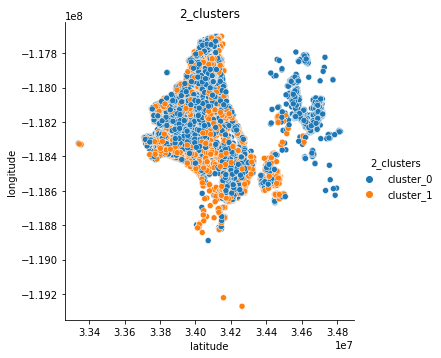

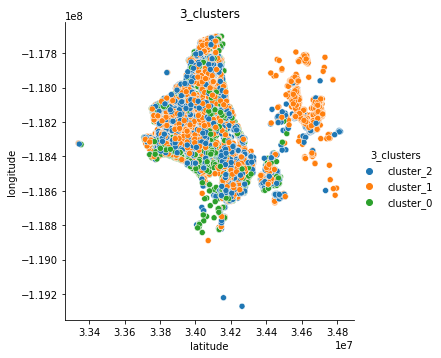

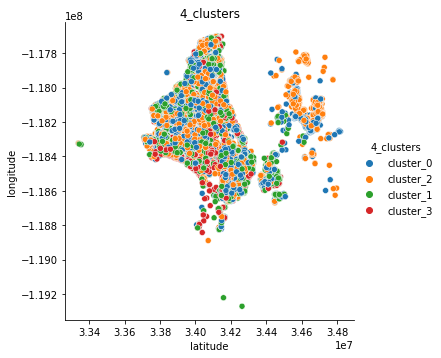

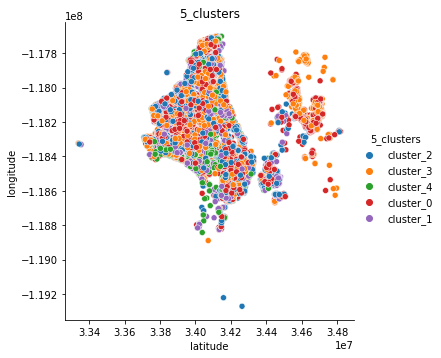

In [58]:
visualize_clusters(cluster_df_geo, 'latitude', 'longitude')

## If we plot lat against long, we get a geographic scatterplot representation of our data

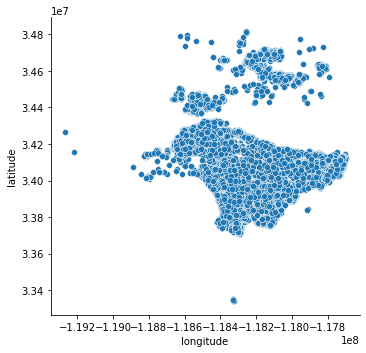

In [61]:
sns.relplot(data = train_scaled, x = 'longitude', y = 'latitude')

>### Is there any correlation between the log error and where a property is located?

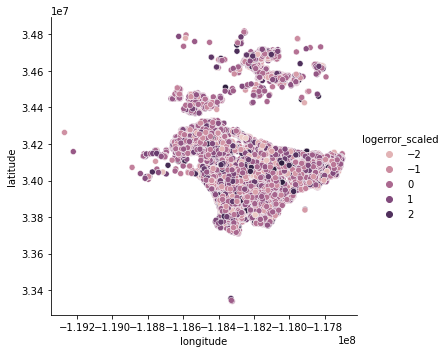

In [69]:
sns.relplot(data = train_scaled, x = 'longitude', y = 'latitude', hue = 'logerror_scaled')

>### ...log error and size (sqft) by location

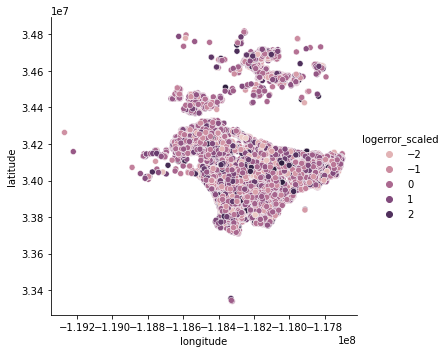

In [71]:
sns.relplot(data = train_scaled, x = 'longitude', y = 'latitude', hue = 'logerror_scaled')

># Takeaway from looking at geo mapped viz's
- These are really cool and helpful to see the actual geographic representation
- Not finding any clear patterns in the data, though :(
    - ***Note: I was clustering using the unscaled data! If I come back to this will make sure to cluster with scaled data. If I have to rerun the notebook again (which I am sure I will, I will add _scaled to the columns in the cluster function!)
- I will come back to this if I have time and explore more, but for now I will trying clustering with lat/long (instead of plotting them) and look at other variables plotted against one another

### ! Code to reset and try new clusters and variables to plot clusters on 

/Users/stephanie/codeup-data-science/zillow-clustering-project/wrangle_jones.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_scaled[[f'{col}_scaled' for col in cols_to_scale]] = scaler.transform(test_scaled[cols_to_scale])
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


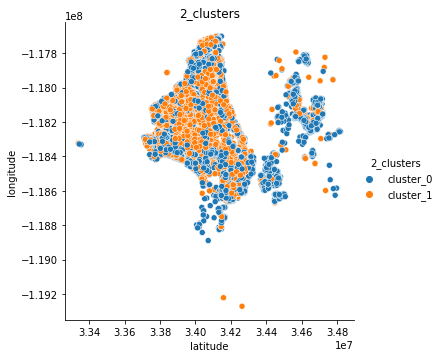

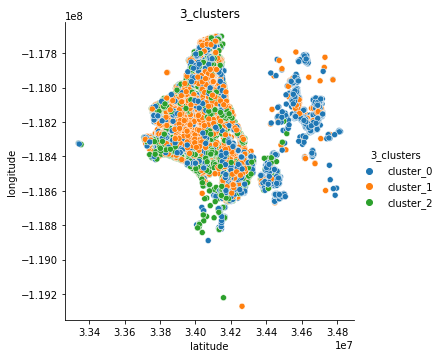

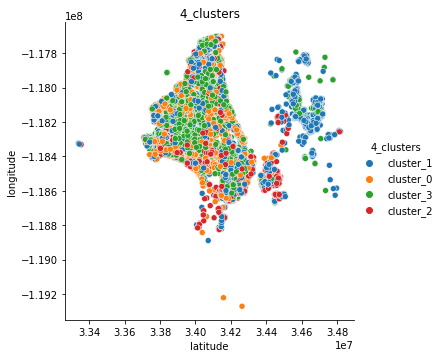

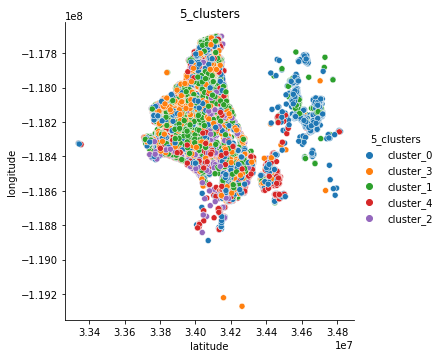

In [72]:
train, validate, test = wrangle_jones.split_data(df)

train, validate, test, train_scaled, validate_scaled, test_scaled = wrangle_jones.scale_data(train, validate, test, df)

cluster_df_geo = cluster_predictions(train_scaled, train_scaled[['age_scaled', 'tax_value_scaled']], 2, 6, 1, train_scaled.columns)

visualize_clusters(cluster_df_geo, 'latitude', 'longitude')

### Some interesting patterns when I look at k = 3
- cluster_0 mostly on the right half
- cluster_1 mostly in top left portion
- cluster_2 mostly in the bottom left portion

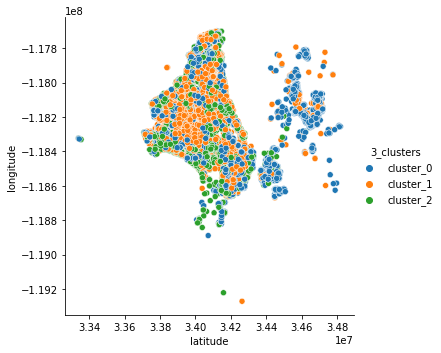

In [73]:
sns.relplot(data = cluster_df_geo, x = 'latitude', y = 'longitude', hue = '3_clusters')